# Data Preprocessing

In [1]:
import pandas as pd
from pathlib import Path
import calendar

In [2]:
rf1 = pd.read_csv('C:\\Users\\Lenovo\\OneDrive\\Desktop\\CMS\\Rainfall\\2004 to 2017 Rainfall Data.csv')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6380\4229719170.py:1: DtypeWarning: Columns (51,72,107) have mixed types. Specify dtype option on import or set low_memory=False.
  rf1 = pd.read_csv('C:\\Users\\Lenovo\\OneDrive\\Desktop\\CMS\\Rainfall\\2004 to 2017 Rainfall Data.csv')


In [3]:
rf1

,Year,DMCODE,New_DIST,NEW_MANDAL,106,206,306,406,506,606,...,2609,2709,2809,2909,3009,June,July,Aug,Sep,total
0,2004,101,Adilabad,Bheempoor,0.0,0.0,0.0,0.0,0.0,4.2,...,0.0,0.0,0.0,0.0,0.0,73.90,162.10,245.80,61.20,543.0
1,2005,101,Adilabad,Bheempoor,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,150.20,452.60,216.10,118.30,937.2
2,2006,101,Adilabad,Bheempoor,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,184.90,268.20,357.30,246.20,1056.6
3,2007,101,Adilabad,Bheempoor,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,279.20,170.40,255.40,235.60,940.6
4,2008,101,Adilabad,Bheempoor,0.0,0.0,0.0,9.6,0.0,8.2,...,0.0,0.0,0.0,0.0,0.0,156.20,222.80,397.80,216.00,992.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8170,2017,3117,Khammam,Thallada,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,194.62,198.30,188.71,195.53,NaN
8171,2017,3118,Khammam,Wyra,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,165.55,166.18,148.30,91.37,NaN
8172,2017,3119,Khammam,Bonakal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,204.70,195.75,260.75,223.10,NaN
8173,2017,3120,Khammam,Madhira,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,228.27,198.43,206.74,64.17,NaN


In [4]:
# keeping necessary data
rf1.drop(rf1.iloc[:,4:-5],axis=1, inplace = True)

In [5]:
rf1.drop('total', axis=1, inplace=True)
rf1

,Year,DMCODE,New_DIST,NEW_MANDAL,June,July,Aug,Sep
0,2004,101,Adilabad,Bheempoor,73.90,162.10,245.80,61.20
1,2005,101,Adilabad,Bheempoor,150.20,452.60,216.10,118.30
2,2006,101,Adilabad,Bheempoor,184.90,268.20,357.30,246.20
3,2007,101,Adilabad,Bheempoor,279.20,170.40,255.40,235.60
4,2008,101,Adilabad,Bheempoor,156.20,222.80,397.80,216.00
...,...,...,...,...,...,...,...,...
8170,2017,3117,Khammam,Thallada,194.62,198.30,188.71,195.53
8171,2017,3118,Khammam,Wyra,165.55,166.18,148.30,91.37
8172,2017,3119,Khammam,Bonakal,204.70,195.75,260.75,223.10
8173,2017,3120,Khammam,Madhira,228.27,198.43,206.74,64.17


In [6]:
# converting months as columns into rows
rf1 = pd.melt(
    rf1,
    id_vars=["Year", "DMCODE", "New_DIST", "NEW_MANDAL"],
    value_vars=["June", "July", "Aug", "Sep"],
    var_name="Month",
    value_name="cummRainFall"
)
rf1

,Year,DMCODE,New_DIST,NEW_MANDAL,Month,cummRainFall
0,2004,101,Adilabad,Bheempoor,June,73.90
1,2005,101,Adilabad,Bheempoor,June,150.20
2,2006,101,Adilabad,Bheempoor,June,184.90
3,2007,101,Adilabad,Bheempoor,June,279.20
4,2008,101,Adilabad,Bheempoor,June,156.20
...,...,...,...,...,...,...
32695,2017,3117,Khammam,Thallada,Sep,195.53
32696,2017,3118,Khammam,Wyra,Sep,91.37
32697,2017,3119,Khammam,Bonakal,Sep,223.10
32698,2017,3120,Khammam,Madhira,Sep,64.17


In [7]:
# creating 'Year-Month' columns
rf1['Year-Month'] = pd.to_datetime(rf1['Year'].astype('str') + '-' + rf1['Month'])
rf1.drop('DMCODE',axis=1,inplace=True)


In [8]:
rf1

,Year,New_DIST,NEW_MANDAL,Month,cummRainFall,Year-Month
0,2004,Adilabad,Bheempoor,June,73.90,2004-06-01
1,2005,Adilabad,Bheempoor,June,150.20,2005-06-01
2,2006,Adilabad,Bheempoor,June,184.90,2006-06-01
3,2007,Adilabad,Bheempoor,June,279.20,2007-06-01
4,2008,Adilabad,Bheempoor,June,156.20,2008-06-01
...,...,...,...,...,...,...
32695,2017,Khammam,Thallada,Sep,195.53,2017-09-01
32696,2017,Khammam,Wyra,Sep,91.37,2017-09-01
32697,2017,Khammam,Bonakal,Sep,223.10,2017-09-01
32698,2017,Khammam,Madhira,Sep,64.17,2017-09-01


In [9]:
# Rearranging and Renaming columns to maintain uniform columns. It helps in merging
rf1 = rf1.iloc[:,[5,0,3,1,2,4]]
rf1.rename(columns = {'New_DIST':'District','NEW_MANDAL':'Mandal'}, inplace = True)
rf1

,Year-Month,Year,Month,District,Mandal,cummRainFall
0,2004-06-01,2004,June,Adilabad,Bheempoor,73.90
1,2005-06-01,2005,June,Adilabad,Bheempoor,150.20
2,2006-06-01,2006,June,Adilabad,Bheempoor,184.90
3,2007-06-01,2007,June,Adilabad,Bheempoor,279.20
4,2008-06-01,2008,June,Adilabad,Bheempoor,156.20
...,...,...,...,...,...,...
32695,2017-09-01,2017,Sep,Khammam,Thallada,195.53
32696,2017-09-01,2017,Sep,Khammam,Wyra,91.37
32697,2017-09-01,2017,Sep,Khammam,Bonakal,223.10
32698,2017-09-01,2017,Sep,Khammam,Madhira,64.17


<Axes: xlabel='Mandal', ylabel='cummRainFall'>

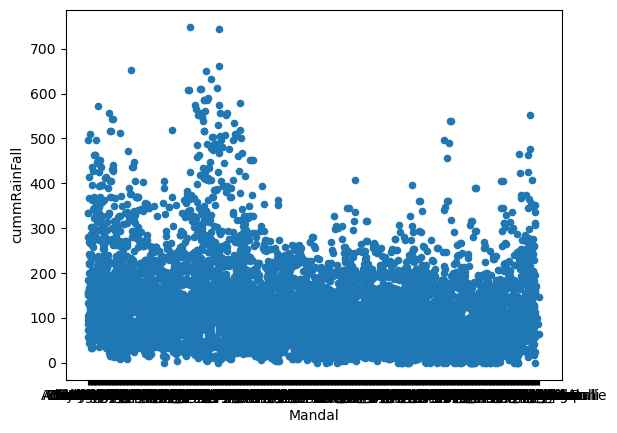

In [10]:
rf1[rf1['Month']=='June'].plot(kind='scatter',x = 'Mandal',y='cummRainFall')

In [11]:
# loading 2nd rainfall dataset
rf2 = pd.read_csv('C:\\Users\\Lenovo\\OneDrive\\Desktop\\CMS\\Rainfall\\2018_daily_rainfall_humidity_data.csv')
rf2

,district,mandal,odate,cumm_rainfall,humidity_min,humidity_max
0,Medchal-Malkajgiri,Uppal,01-06-2018,0.0,30.1,76.7
1,Medchal-Malkajgiri,Uppal,02-06-2018,0.0,5.5,75.0
2,Medchal-Malkajgiri,Uppal,03-06-2018,0.0,55.5,83.7
3,Medchal-Malkajgiri,Uppal,04-06-2018,1.8,35.4,75.9
4,Medchal-Malkajgiri,Uppal,05-06-2018,0.5,28.0,76.4
...,...,...,...,...,...,...
105281,Wanaparthy,Srirangapur,26-09-2018,0.0,45.9,79.6
105282,Wanaparthy,Srirangapur,27-09-2018,0.0,57.9,76.9
105283,Wanaparthy,Srirangapur,28-09-2018,0.0,56.3,83.2
105284,Wanaparthy,Srirangapur,29-09-2018,0.0,51.2,80.8


In [12]:
rf2.drop(['humidity_min','humidity_max'], axis=1, inplace = True)
rf2

,district,mandal,odate,cumm_rainfall
0,Medchal-Malkajgiri,Uppal,01-06-2018,0.0
1,Medchal-Malkajgiri,Uppal,02-06-2018,0.0
2,Medchal-Malkajgiri,Uppal,03-06-2018,0.0
3,Medchal-Malkajgiri,Uppal,04-06-2018,1.8
4,Medchal-Malkajgiri,Uppal,05-06-2018,0.5
...,...,...,...,...
105281,Wanaparthy,Srirangapur,26-09-2018,0.0
105282,Wanaparthy,Srirangapur,27-09-2018,0.0
105283,Wanaparthy,Srirangapur,28-09-2018,0.0
105284,Wanaparthy,Srirangapur,29-09-2018,0.0


In [13]:
rf2['odate'] = pd.to_datetime(rf2['odate'], dayfirst = True)

In [14]:
# creating Month and year columns
rf2['Year'] = rf2['odate'].dt.year
rf2['Month'] = rf2['odate'].dt.month
rf2['Month'] = rf2['Month'].apply(lambda x: calendar.month_abbr[x])

In [15]:
rf2

,district,mandal,odate,cumm_rainfall,Year,Month
0,Medchal-Malkajgiri,Uppal,2018-06-01,0.0,2018,Jun
1,Medchal-Malkajgiri,Uppal,2018-06-02,0.0,2018,Jun
2,Medchal-Malkajgiri,Uppal,2018-06-03,0.0,2018,Jun
3,Medchal-Malkajgiri,Uppal,2018-06-04,1.8,2018,Jun
4,Medchal-Malkajgiri,Uppal,2018-06-05,0.5,2018,Jun
...,...,...,...,...,...,...
105281,Wanaparthy,Srirangapur,2018-09-26,0.0,2018,Sep
105282,Wanaparthy,Srirangapur,2018-09-27,0.0,2018,Sep
105283,Wanaparthy,Srirangapur,2018-09-28,0.0,2018,Sep
105284,Wanaparthy,Srirangapur,2018-09-29,0.0,2018,Sep


In [16]:
# aggregrating data to month level
rf2_agg = rf2.groupby(["district", "mandal", "Year", "Month"], as_index=False).agg({"cumm_rainfall": "sum"})
rf2_agg

,district,mandal,Year,Month,cumm_rainfall
0,Adilabad,Adilabad (Urban),2018,Aug,878.2
1,Adilabad,Adilabad (Urban),2018,Jul,653.5
2,Adilabad,Adilabad (Urban),2018,Jun,403.1
3,Adilabad,Adilabad (Urban),2018,Sep,307.8
4,Adilabad,Adilabad Rural,2018,Aug,427.1
...,...,...,...,...,...
2339,Yadadri-Bhongir,Valigonda,2018,Sep,125.7
2340,Yadadri-Bhongir,Yadagirigutta,2018,Aug,75.0
2341,Yadadri-Bhongir,Yadagirigutta,2018,Jul,7.6
2342,Yadadri-Bhongir,Yadagirigutta,2018,Jun,121.5


<Axes: xlabel='mandal', ylabel='cumm_rainfall'>

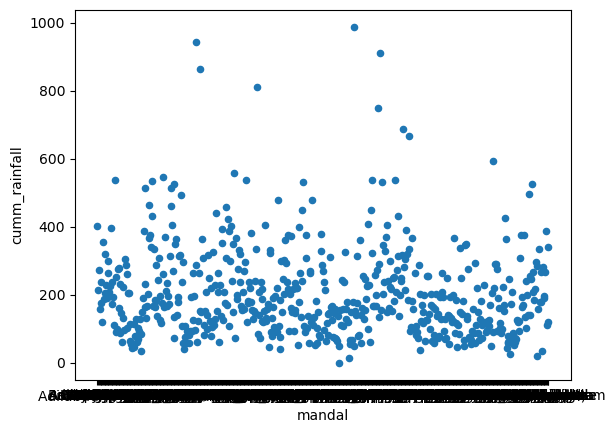

In [17]:
rf2_agg[rf2_agg['Month']=='Jun'].plot(kind='scatter',x = 'mandal',y='cumm_rainfall')

In [18]:
# creating 'Year-Month' column
rf2_agg['Year-Month'] = pd.to_datetime(rf2_agg['Year'].astype('str') + '-' + rf2_agg['Month'])
rf2_agg


,district,mandal,Year,Month,cumm_rainfall,Year-Month
0,Adilabad,Adilabad (Urban),2018,Aug,878.2,2018-08-01
1,Adilabad,Adilabad (Urban),2018,Jul,653.5,2018-07-01
2,Adilabad,Adilabad (Urban),2018,Jun,403.1,2018-06-01
3,Adilabad,Adilabad (Urban),2018,Sep,307.8,2018-09-01
4,Adilabad,Adilabad Rural,2018,Aug,427.1,2018-08-01
...,...,...,...,...,...,...
2339,Yadadri-Bhongir,Valigonda,2018,Sep,125.7,2018-09-01
2340,Yadadri-Bhongir,Yadagirigutta,2018,Aug,75.0,2018-08-01
2341,Yadadri-Bhongir,Yadagirigutta,2018,Jul,7.6,2018-07-01
2342,Yadadri-Bhongir,Yadagirigutta,2018,Jun,121.5,2018-06-01


In [19]:
# rearranging and renaming columns
rf2_agg = rf2_agg.iloc[:,[5,2,3,0,1,4]]
rf2_agg.rename(columns = {'district':'District','mandal':'Mandal','cumm_rainfall':'cummRainFall'},inplace = True)
rf2_agg

,Year-Month,Year,Month,District,Mandal,cummRainFall
0,2018-08-01,2018,Aug,Adilabad,Adilabad (Urban),878.2
1,2018-07-01,2018,Jul,Adilabad,Adilabad (Urban),653.5
2,2018-06-01,2018,Jun,Adilabad,Adilabad (Urban),403.1
3,2018-09-01,2018,Sep,Adilabad,Adilabad (Urban),307.8
4,2018-08-01,2018,Aug,Adilabad,Adilabad Rural,427.1
...,...,...,...,...,...,...
2339,2018-09-01,2018,Sep,Yadadri-Bhongir,Valigonda,125.7
2340,2018-08-01,2018,Aug,Yadadri-Bhongir,Yadagirigutta,75.0
2341,2018-07-01,2018,Jul,Yadadri-Bhongir,Yadagirigutta,7.6
2342,2018-06-01,2018,Jun,Yadadri-Bhongir,Yadagirigutta,121.5


In [20]:
# loading 3rd rainfall dataset
rf3 = pd.read_csv('C:\\Users\\Lenovo\\OneDrive\\Desktop\\CMS\\Rainfall\\rainfall_June_to_Sept_2019.csv')
rf3

,District,Mandal,Date,Rainfall (mm),humidity_min (%),Humidity_max (%)
0,Adilabad,Bheempoor,01-07-2019,3.5,74.2,94.6
1,Adilabad,Bheempoor,02-07-2019,0.0,68.2,91.8
2,Adilabad,Bheempoor,03-07-2019,40.5,67.2,95.3
3,Adilabad,Bheempoor,04-07-2019,20.0,66.6,96.3
4,Adilabad,Bheempoor,05-07-2019,1.0,57.9,92.5
...,...,...,...,...,...,...
71264,Narayanpet,Kosgi,26-06-2019,0.0,51.7,94.1
71265,Narayanpet,Kosgi,27-06-2019,0.0,52.2,82.8
71266,Narayanpet,Kosgi,28-06-2019,0.0,49.2,83.5
71267,Narayanpet,Kosgi,29-06-2019,0.6,59.0,86.3


In [21]:
rf3.drop(['humidity_min (%)',"Humidity_max (%)"], axis=1, inplace = True)
rf3

,District,Mandal,Date,Rainfall (mm)
0,Adilabad,Bheempoor,01-07-2019,3.5
1,Adilabad,Bheempoor,02-07-2019,0.0
2,Adilabad,Bheempoor,03-07-2019,40.5
3,Adilabad,Bheempoor,04-07-2019,20.0
4,Adilabad,Bheempoor,05-07-2019,1.0
...,...,...,...,...
71264,Narayanpet,Kosgi,26-06-2019,0.0
71265,Narayanpet,Kosgi,27-06-2019,0.0
71266,Narayanpet,Kosgi,28-06-2019,0.0
71267,Narayanpet,Kosgi,29-06-2019,0.6


In [22]:
rf3['Date'] = pd.to_datetime(rf3['Date'], dayfirst = True)

In [23]:
rf3['Year'] = rf3['Date'].dt.year
rf3['Month'] = rf3['Date'].dt.month
rf3['Month'] = rf3['Month'].apply(lambda x: calendar.month_abbr[x])
rf3

,District,Mandal,Date,Rainfall (mm),Year,Month
0,Adilabad,Bheempoor,2019-07-01,3.5,2019,Jul
1,Adilabad,Bheempoor,2019-07-02,0.0,2019,Jul
2,Adilabad,Bheempoor,2019-07-03,40.5,2019,Jul
3,Adilabad,Bheempoor,2019-07-04,20.0,2019,Jul
4,Adilabad,Bheempoor,2019-07-05,1.0,2019,Jul
...,...,...,...,...,...,...
71264,Narayanpet,Kosgi,2019-06-26,0.0,2019,Jun
71265,Narayanpet,Kosgi,2019-06-27,0.0,2019,Jun
71266,Narayanpet,Kosgi,2019-06-28,0.0,2019,Jun
71267,Narayanpet,Kosgi,2019-06-29,0.6,2019,Jun


In [24]:
# monthly aggregration of daily rainfall data
rf3_agg = rf3.groupby(["District", "Mandal", "Year", "Month"], as_index=False).agg({'Rainfall (mm)': "sum"})
rf3_agg

,District,Mandal,Year,Month,Rainfall (mm)
0,Adilabad,Adilabad (Urban),2019,Aug,232.6
1,Adilabad,Adilabad (Urban),2019,Jul,307.8
2,Adilabad,Adilabad (Urban),2019,Jun,119.3
3,Adilabad,Adilabad (Urban),2019,Sep,25.5
4,Adilabad,Adilabad Rural,2019,Aug,225.9
...,...,...,...,...,...
2462,Yadadri-Bhongir,Valigonda,2019,Sep,229.0
2463,Yadadri-Bhongir,Yadagirigutta,2019,Aug,118.9
2464,Yadadri-Bhongir,Yadagirigutta,2019,Jul,127.6
2465,Yadadri-Bhongir,Yadagirigutta,2019,Jun,42.4


In [25]:
rf3_agg['Year-Month'] = pd.to_datetime(rf3_agg['Year'].astype('str') + '-' + rf3_agg['Month'])
rf3_agg

,District,Mandal,Year,Month,Rainfall (mm),Year-Month
0,Adilabad,Adilabad (Urban),2019,Aug,232.6,2019-08-01
1,Adilabad,Adilabad (Urban),2019,Jul,307.8,2019-07-01
2,Adilabad,Adilabad (Urban),2019,Jun,119.3,2019-06-01
3,Adilabad,Adilabad (Urban),2019,Sep,25.5,2019-09-01
4,Adilabad,Adilabad Rural,2019,Aug,225.9,2019-08-01
...,...,...,...,...,...,...
2462,Yadadri-Bhongir,Valigonda,2019,Sep,229.0,2019-09-01
2463,Yadadri-Bhongir,Yadagirigutta,2019,Aug,118.9,2019-08-01
2464,Yadadri-Bhongir,Yadagirigutta,2019,Jul,127.6,2019-07-01
2465,Yadadri-Bhongir,Yadagirigutta,2019,Jun,42.4,2019-06-01


In [26]:
# Rearranging and renaming columns to maintain uniform columns
rf3_agg = rf3_agg.iloc[:,[5,2,3,0,1,4]]
rf3_agg.rename(columns = {"Rainfall (mm)": 'cummRainFall'}, inplace = True)
rf3_agg

,Year-Month,Year,Month,District,Mandal,cummRainFall
0,2019-08-01,2019,Aug,Adilabad,Adilabad (Urban),232.6
1,2019-07-01,2019,Jul,Adilabad,Adilabad (Urban),307.8
2,2019-06-01,2019,Jun,Adilabad,Adilabad (Urban),119.3
3,2019-09-01,2019,Sep,Adilabad,Adilabad (Urban),25.5
4,2019-08-01,2019,Aug,Adilabad,Adilabad Rural,225.9
...,...,...,...,...,...,...
2462,2019-09-01,2019,Sep,Yadadri-Bhongir,Valigonda,229.0
2463,2019-08-01,2019,Aug,Yadadri-Bhongir,Yadagirigutta,118.9
2464,2019-07-01,2019,Jul,Yadadri-Bhongir,Yadagirigutta,127.6
2465,2019-06-01,2019,Jun,Yadadri-Bhongir,Yadagirigutta,42.4


In [27]:
# bringing 3 datasets together to form one complete dataset
rainfall_df = pd.concat([rf1, rf2_agg, rf3_agg])
rainfall_df

,Year-Month,Year,Month,District,Mandal,cummRainFall
0,2004-06-01,2004,June,Adilabad,Bheempoor,73.9
1,2005-06-01,2005,June,Adilabad,Bheempoor,150.2
2,2006-06-01,2006,June,Adilabad,Bheempoor,184.9
3,2007-06-01,2007,June,Adilabad,Bheempoor,279.2
4,2008-06-01,2008,June,Adilabad,Bheempoor,156.2
...,...,...,...,...,...,...
2462,2019-09-01,2019,Sep,Yadadri-Bhongir,Valigonda,229.0
2463,2019-08-01,2019,Aug,Yadadri-Bhongir,Yadagirigutta,118.9
2464,2019-07-01,2019,Jul,Yadadri-Bhongir,Yadagirigutta,127.6
2465,2019-06-01,2019,Jun,Yadadri-Bhongir,Yadagirigutta,42.4


In [28]:
# handling outliers by capping first and last 5% data to 5% and 95% as minimum and maximum data
lower_limit = rainfall_df['cummRainFall'].quantile(0.05)  
upper_limit = rainfall_df['cummRainFall'].quantile(0.95) 

rainfall_df['cummRainFall'] = rainfall_df['cummRainFall'].clip(lower=lower_limit, upper=upper_limit)
    
rainfall_df

,Year-Month,Year,Month,District,Mandal,cummRainFall
0,2004-06-01,2004,June,Adilabad,Bheempoor,73.9
1,2005-06-01,2005,June,Adilabad,Bheempoor,150.2
2,2006-06-01,2006,June,Adilabad,Bheempoor,184.9
3,2007-06-01,2007,June,Adilabad,Bheempoor,279.2
4,2008-06-01,2008,June,Adilabad,Bheempoor,156.2
...,...,...,...,...,...,...
2462,2019-09-01,2019,Sep,Yadadri-Bhongir,Valigonda,229.0
2463,2019-08-01,2019,Aug,Yadadri-Bhongir,Yadagirigutta,118.9
2464,2019-07-01,2019,Jul,Yadadri-Bhongir,Yadagirigutta,127.6
2465,2019-06-01,2019,Jun,Yadadri-Bhongir,Yadagirigutta,42.4


In [29]:
rainfall_df.District.unique()

array(['Adilabad', 'Kumarambheem Asifabad', 'Mancherial', 'Nirmal',
       'Nizamabad', 'Jagtial', 'Peddapalle', 'Jayashankar Bhupalpally',
       'Bhadradri Kothagudem', 'Mahabubabad', 'Warangal_Rural',
       'Warangal_Urban', 'Karimnagar', 'Rajanna Sircilla', 'Kamareddy',
       'Sangareddy', 'Medak', 'Siddipet', 'Jangaon',
       'Yadadri Bhuvanagiri', 'Medchal_Malkajgiri', 'Hyderabad',
       'Rangareddy', 'Vikarabad', 'Mahabubnagar', 'Jogulamba Gadwal',
       'Wanaparthy', 'Nagarkurnool', 'Nalgonda', 'Suryapet', 'Khammam',
       'Komaram Bheem-Asifabad', 'Peddapalli', 'Jayashankar-Bhupalpally',
       'Bhadradri-Kothagudem', 'Warangal Rural', 'Warangal Urban',
       'Rajanna-Siricilla', 'Yadadri-Bhongir', 'Medchal-Malkajgiri',
       'Jogulamba-Gadwal', 'Kumuram Bheem - Asifabad', 'Warangal (R)',
       'Warangal (U)', 'Mulug', 'Narayanpet'], dtype=object)

In [30]:
# mapping the duplicate district names into uniform names across all datasets
district_mapping = {
    'Kumarambheem Asifabad': 'Kumuram Bheem',
    'Komaram Bheem-Asifabad': 'Kumuram Bheem',
    'Kumuram Bheem - Asifabad': 'Kumuram Bheem',
    'Asifabad': 'Kumuram Bheem',
    'Jagital': 'Jagtial',
    'Warangal_Rural': 'Warangal Rural',
    'Warangal (U)': 'Warangal Urban',
    'Warangal (R)': 'Warangal Rural',
    'Warangal_Urban': 'Warangal Urban',
    'Warangal_Rural': 'Warangal Rural',
    'Jayashankar Bhupalpally': 'Jayashankar-Bhupalpally',
    'Bhadradri Kothagudem': 'Bhadradri-Kothagudem',
    'Rajanna Sircilla': 'Rajanna-Siricilla',
    'Yadadri Bhuvanagiri': 'Yadadri-Bhongir',
    'Medchal_Malkajgiri': 'Medchal-Malkajgiri',
    'Jogulamba Gadwal': 'Jogulamba-Gadwal',
    'Mahabubnagar': 'Mahbubnagar',  
    'Peddapalle':'Peddapalli',
    ## The below 2 districts are new districts from 2019
    'Mulug':'Jayashankar-Bhupalpally',
    'Narayanpet':'Mahbubnagar'
}

rainfall_df['District'] = rainfall_df['District'].replace(district_mapping)



In [31]:
print(rainfall_df['District'].nunique())

31


In [32]:
# creates 'rainfall_final.csv' file that is used in analysis notebook
rainfall_df.to_csv('rainfall_final.csv')

# Prices

In [33]:
all_files = Path('C:\\Users\\Lenovo\\OneDrive\\Desktop\\CMS\\Market Yard Prices').glob('*.csv')

In [34]:
dframes = []
for i,f in enumerate(all_files):
    data = pd.read_csv(f)
    data['file'] = f'File {i}'
    dframes.append(data)
    print(i)

0
1
2
3
4
5


In [35]:
# concatinating all loaded files
prices_df = pd.concat(dframes, ignore_index=True)
prices_df

,DDate,AmcCode,AmcName,YardCode,YardName,CommCode,CommName,VarityCode,VarityName,Arrivals,Minimum,Maximum,Model,file
0,2014-01-02 00:00:00+05:30,246,Warangal,886,Warangal,1,Paddy,1,Common,637.0,1310.0,1330.0,1320.0,File 0
1,2014-01-02 00:00:00+05:30,221,Jammikunta,36,Jammikunta,1,Paddy,240,Common (1001),161.0,1300.0,1310.0,1310.0,File 0
2,2014-01-03 00:00:00+05:30,246,Warangal,886,Warangal,1,Paddy,1,Common,287.0,1310.0,1330.0,1320.0,File 0
3,2014-01-04 00:00:00+05:30,246,Warangal,886,Warangal,1,Paddy,1,Common,329.0,1310.0,1330.0,1320.0,File 0
4,2014-01-06 00:00:00+05:30,246,Warangal,886,Warangal,1,Paddy,1,Common,149.0,1500.0,1675.0,1600.0,File 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256031,2019-01-15 00:00:00+05:30,324,Bowenpally,3,Bowenpally,212,Gajar,211,Common,141.0,800.0,1200.0,1000.0,File 5
256032,2019-01-14 00:00:00+05:30,324,Bowenpally,3,Bowenpally,212,Gajar,211,Common,100.0,1000.0,1500.0,1300.0,File 5
256033,2019-01-13 00:00:00+05:30,324,Bowenpally,3,Bowenpally,212,Gajar,211,Common,267.0,500.0,1500.0,1200.0,File 5
256034,2019-09-03 00:00:00+05:30,324,Bowenpally,3,Bowenpally,235,Teisel Gourd(Boda Kakarakaya),281,Local,55.0,5000.0,10000.0,8000.0,File 5


In [36]:
# keeping necessary data
prices_df = prices_df[['DDate','YardName','AmcName','CommName','VarityName','Arrivals','Model']]
prices_df

,DDate,YardName,AmcName,CommName,VarityName,Arrivals,Model
0,2014-01-02 00:00:00+05:30,Warangal,Warangal,Paddy,Common,637.0,1320.0
1,2014-01-02 00:00:00+05:30,Jammikunta,Jammikunta,Paddy,Common (1001),161.0,1310.0
2,2014-01-03 00:00:00+05:30,Warangal,Warangal,Paddy,Common,287.0,1320.0
3,2014-01-04 00:00:00+05:30,Warangal,Warangal,Paddy,Common,329.0,1320.0
4,2014-01-06 00:00:00+05:30,Warangal,Warangal,Paddy,Common,149.0,1600.0
...,...,...,...,...,...,...,...
256031,2019-01-15 00:00:00+05:30,Bowenpally,Bowenpally,Gajar,Common,141.0,1000.0
256032,2019-01-14 00:00:00+05:30,Bowenpally,Bowenpally,Gajar,Common,100.0,1300.0
256033,2019-01-13 00:00:00+05:30,Bowenpally,Bowenpally,Gajar,Common,267.0,1200.0
256034,2019-09-03 00:00:00+05:30,Bowenpally,Bowenpally,Teisel Gourd(Boda Kakarakaya),Local,55.0,8000.0


In [37]:
# finding top crops based on volume
prices_df.groupby(['CommName']).agg({'Arrivals':'sum'}).sort_values(by = 'Arrivals', ascending = False)

,Arrivals
CommName,
Cotton,3.050153e+07
Paddy,2.080650e+07
Maize,9.729658e+06
Onions,9.646502e+06
Chillies(Dry),7.637854e+06
...,...
Santra,5.500000e+01
Vegetables(All),1.300000e+01
Common Millet,6.000000e+00


In [38]:
# creating a dataframe of the selected top 5 crops
top_crop_prices_df = prices_df[prices_df['CommName'].isin(['Cotton','Paddy','Maize','Onions','Chillies(Dry)'])]

In [39]:
top_crop_prices_df

,DDate,YardName,AmcName,CommName,VarityName,Arrivals,Model
0,2014-01-02 00:00:00+05:30,Warangal,Warangal,Paddy,Common,637.0,1320.0
1,2014-01-02 00:00:00+05:30,Jammikunta,Jammikunta,Paddy,Common (1001),161.0,1310.0
2,2014-01-03 00:00:00+05:30,Warangal,Warangal,Paddy,Common,287.0,1320.0
3,2014-01-04 00:00:00+05:30,Warangal,Warangal,Paddy,Common,329.0,1320.0
4,2014-01-06 00:00:00+05:30,Warangal,Warangal,Paddy,Common,149.0,1600.0
...,...,...,...,...,...,...,...
252663,2019-01-28 00:00:00+05:30,Nizamabad,Nizamabad,Onions,No.I,171.0,651.0
252667,2019-01-30 00:00:00+05:30,Nizamabad,Nizamabad,Onions,No.I,58.0,686.0
252671,2019-01-31 00:00:00+05:30,Nizamabad,Nizamabad,Onions,No.I,47.0,401.0
252672,2019-02-01 00:00:00+05:30,Nizamabad,Nizamabad,Onions,No.I,28.0,767.0


In [40]:
# aggregrating all varieties
top_crop_prices_df = top_crop_prices_df.groupby(['DDate','YardName','AmcName','CommName'], as_index = False).agg({'Arrivals':'sum','Model':'mean'})
top_crop_prices_df

,DDate,YardName,AmcName,CommName,Arrivals,Model
0,2014-01-02 00:00:00+05:30,Adilabad,Adilabad,Cotton,9291.0,4891.000000
1,2014-01-02 00:00:00+05:30,Jammikunta,Jammikunta,Cotton,1436.0,4500.000000
2,2014-01-02 00:00:00+05:30,Jammikunta,Jammikunta,Maize,21.0,870.000000
3,2014-01-02 00:00:00+05:30,Jammikunta,Jammikunta,Paddy,298.0,1416.666667
4,2014-01-02 00:00:00+05:30,Warangal,Warangal,Chillies(Dry),367.0,7750.000000
...,...,...,...,...,...,...
55584,2019-12-31 00:00:00+05:30,Tirmalagiri,Thirumalagiri,Paddy,1067.0,1594.666667
55585,2019-12-31 00:00:00+05:30,Warangal,Warangal,Chillies(Dry),899.0,10000.000000
55586,2019-12-31 00:00:00+05:30,Warangal,Warangal,Cotton,14047.0,5211.500000
55587,2019-12-31 00:00:00+05:30,Warangal,Warangal,Maize,11.0,1621.000000


In [41]:
top_crop_prices_df.describe()

,Arrivals,Model
count,5.558900e+04,5.558900e+04
mean,1.408948e+03,2.795752e+03
std,7.367620e+03,2.423939e+04
min,1.000000e-02,0.000000e+00
25%,7.525000e+01,1.431000e+03
50%,3.170000e+02,1.669000e+03
75%,1.095000e+03,4.400000e+03
max,1.539348e+06,5.697883e+06


<Axes: title={'center': 'Arrivals'}, xlabel='CommName'>

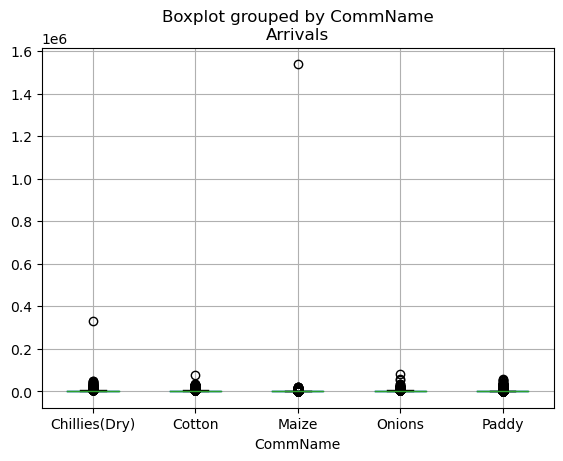

In [42]:
top_crop_prices_df.boxplot(by='CommName', column=['Arrivals'])

In [43]:
# handling outliers by capping them to 5th percentile and 95th percentile
columns_to_cap = ["Arrivals", "Model"]

for col in columns_to_cap:
    lower_limit = top_crop_prices_df[col].quantile(0.05)  
    upper_limit = top_crop_prices_df[col].quantile(0.95) 
    
    top_crop_prices_df[col] = top_crop_prices_df[col].clip(lower=lower_limit, upper=upper_limit)
    
top_crop_prices_df

,DDate,YardName,AmcName,CommName,Arrivals,Model
0,2014-01-02 00:00:00+05:30,Adilabad,Adilabad,Cotton,6966.8,4891.000000
1,2014-01-02 00:00:00+05:30,Jammikunta,Jammikunta,Cotton,1436.0,4500.000000
2,2014-01-02 00:00:00+05:30,Jammikunta,Jammikunta,Maize,21.0,1100.000000
3,2014-01-02 00:00:00+05:30,Jammikunta,Jammikunta,Paddy,298.0,1416.666667
4,2014-01-02 00:00:00+05:30,Warangal,Warangal,Chillies(Dry),367.0,5610.000000
...,...,...,...,...,...,...
55584,2019-12-31 00:00:00+05:30,Tirmalagiri,Thirumalagiri,Paddy,1067.0,1594.666667
55585,2019-12-31 00:00:00+05:30,Warangal,Warangal,Chillies(Dry),899.0,5610.000000
55586,2019-12-31 00:00:00+05:30,Warangal,Warangal,Cotton,6966.8,5211.500000
55587,2019-12-31 00:00:00+05:30,Warangal,Warangal,Maize,11.0,1621.000000


In [44]:
# calculating Weighted modal 
top_crop_prices_df['Weighted_Modal'] = top_crop_prices_df.Arrivals*top_crop_prices_df.Model
top_crop_prices_df

,DDate,YardName,AmcName,CommName,Arrivals,Model,Weighted_Modal
0,2014-01-02 00:00:00+05:30,Adilabad,Adilabad,Cotton,6966.8,4891.000000,3.407462e+07
1,2014-01-02 00:00:00+05:30,Jammikunta,Jammikunta,Cotton,1436.0,4500.000000,6.462000e+06
2,2014-01-02 00:00:00+05:30,Jammikunta,Jammikunta,Maize,21.0,1100.000000,2.310000e+04
3,2014-01-02 00:00:00+05:30,Jammikunta,Jammikunta,Paddy,298.0,1416.666667,4.221667e+05
4,2014-01-02 00:00:00+05:30,Warangal,Warangal,Chillies(Dry),367.0,5610.000000,2.058870e+06
...,...,...,...,...,...,...,...
55584,2019-12-31 00:00:00+05:30,Tirmalagiri,Thirumalagiri,Paddy,1067.0,1594.666667,1.701509e+06
55585,2019-12-31 00:00:00+05:30,Warangal,Warangal,Chillies(Dry),899.0,5610.000000,5.043390e+06
55586,2019-12-31 00:00:00+05:30,Warangal,Warangal,Cotton,6966.8,5211.500000,3.630748e+07
55587,2019-12-31 00:00:00+05:30,Warangal,Warangal,Maize,11.0,1621.000000,1.783100e+04


In [45]:
# loading market yard dataset to assign districts to the 'top_crop_prices_df' dataset
district_yard_names = pd.read_csv('C:\\Users\\Lenovo\\OneDrive\\Desktop\\CMS\\market yards list.csv')

In [46]:
district_yard_names

,District,A.M.C Name,Market Yard Name,Market Type
0,Adilabad,Adilabad,Adilabad,Seasonal
1,Adilabad,Boath,Boath,Seasonal
2,Adilabad,Ichoda,Echoda,Seasonal
3,Adilabad,Jainath,Jainath,Non-Functional
4,Adilabad,Jainath,Bela,Non-Functional
...,...,...,...,...
265,Yadadri (Bhongir),Mothkur,Gundala,Non-Functional
266,Yadadri (Bhongir),Mothkur,Atmakur,Non-Functional
267,Yadadri (Bhongir),Chouttuppal,Chouttuppal,Functional
268,Yadadri (Bhongir),Valigonda,Valigonda,Functional


In [47]:
district_yard_names.rename(columns={'District':'District','Market Yard Name':'YardName'}, inplace=True)

In [48]:
top_crop_prices_df

,DDate,YardName,AmcName,CommName,Arrivals,Model,Weighted_Modal
0,2014-01-02 00:00:00+05:30,Adilabad,Adilabad,Cotton,6966.8,4891.000000,3.407462e+07
1,2014-01-02 00:00:00+05:30,Jammikunta,Jammikunta,Cotton,1436.0,4500.000000,6.462000e+06
2,2014-01-02 00:00:00+05:30,Jammikunta,Jammikunta,Maize,21.0,1100.000000,2.310000e+04
3,2014-01-02 00:00:00+05:30,Jammikunta,Jammikunta,Paddy,298.0,1416.666667,4.221667e+05
4,2014-01-02 00:00:00+05:30,Warangal,Warangal,Chillies(Dry),367.0,5610.000000,2.058870e+06
...,...,...,...,...,...,...,...
55584,2019-12-31 00:00:00+05:30,Tirmalagiri,Thirumalagiri,Paddy,1067.0,1594.666667,1.701509e+06
55585,2019-12-31 00:00:00+05:30,Warangal,Warangal,Chillies(Dry),899.0,5610.000000,5.043390e+06
55586,2019-12-31 00:00:00+05:30,Warangal,Warangal,Cotton,6966.8,5211.500000,3.630748e+07
55587,2019-12-31 00:00:00+05:30,Warangal,Warangal,Maize,11.0,1621.000000,1.783100e+04


In [49]:
# merging the datasets to add district names
final_df = pd.merge(top_crop_prices_df,district_yard_names, on = 'YardName')
final_df

,DDate,YardName,AmcName,CommName,Arrivals,Model,Weighted_Modal,District,A.M.C Name,Market Type
0,2014-01-02 00:00:00+05:30,Adilabad,Adilabad,Cotton,6966.8,4891.0,34074618.8,Adilabad,Adilabad,Seasonal
1,2014-01-03 00:00:00+05:30,Adilabad,Adilabad,Cotton,6966.8,4891.0,34074618.8,Adilabad,Adilabad,Seasonal
2,2014-01-04 00:00:00+05:30,Adilabad,Adilabad,Cotton,6966.8,4830.0,33649644.0,Adilabad,Adilabad,Seasonal
3,2014-01-06 00:00:00+05:30,Adilabad,Adilabad,Cotton,6966.8,4845.0,33754146.0,Adilabad,Adilabad,Seasonal
4,2014-01-07 00:00:00+05:30,Adilabad,Adilabad,Cotton,6966.8,4898.0,34123386.4,Adilabad,Adilabad,Seasonal
...,...,...,...,...,...,...,...,...,...,...
56514,2019-12-16 00:00:00+05:30,Damaracherla,Miryalguda,Paddy,230.0,1835.0,422050.0,Nalgonda,Miryalguda,Non-Functional
56515,2019-12-20 00:00:00+05:30,Damaracherla,Miryalguda,Paddy,267.0,1835.0,489945.0,Nalgonda,Miryalguda,Non-Functional
56516,2019-12-22 00:00:00+05:30,Damaracherla,Miryalguda,Paddy,249.0,1835.0,456915.0,Nalgonda,Miryalguda,Non-Functional
56517,2019-12-28 00:00:00+05:30,Damaracherla,Miryalguda,Paddy,313.0,1835.0,574355.0,Nalgonda,Miryalguda,Non-Functional


In [50]:
final_df['DDate'] = pd.to_datetime(final_df['DDate'])

In [51]:
# creating 'Year' and 'Month' columns
final_df['Year'] = final_df['DDate'].dt.year
final_df['Month'] = final_df['DDate'].dt.month
final_df['Month'] = final_df['Month'].apply(lambda x: calendar.month_abbr[x])
final_df

,DDate,YardName,AmcName,CommName,Arrivals,Model,Weighted_Modal,District,A.M.C Name,Market Type,Year,Month
0,2014-01-02 00:00:00+05:30,Adilabad,Adilabad,Cotton,6966.8,4891.0,34074618.8,Adilabad,Adilabad,Seasonal,2014,Jan
1,2014-01-03 00:00:00+05:30,Adilabad,Adilabad,Cotton,6966.8,4891.0,34074618.8,Adilabad,Adilabad,Seasonal,2014,Jan
2,2014-01-04 00:00:00+05:30,Adilabad,Adilabad,Cotton,6966.8,4830.0,33649644.0,Adilabad,Adilabad,Seasonal,2014,Jan
3,2014-01-06 00:00:00+05:30,Adilabad,Adilabad,Cotton,6966.8,4845.0,33754146.0,Adilabad,Adilabad,Seasonal,2014,Jan
4,2014-01-07 00:00:00+05:30,Adilabad,Adilabad,Cotton,6966.8,4898.0,34123386.4,Adilabad,Adilabad,Seasonal,2014,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...
56514,2019-12-16 00:00:00+05:30,Damaracherla,Miryalguda,Paddy,230.0,1835.0,422050.0,Nalgonda,Miryalguda,Non-Functional,2019,Dec
56515,2019-12-20 00:00:00+05:30,Damaracherla,Miryalguda,Paddy,267.0,1835.0,489945.0,Nalgonda,Miryalguda,Non-Functional,2019,Dec
56516,2019-12-22 00:00:00+05:30,Damaracherla,Miryalguda,Paddy,249.0,1835.0,456915.0,Nalgonda,Miryalguda,Non-Functional,2019,Dec
56517,2019-12-28 00:00:00+05:30,Damaracherla,Miryalguda,Paddy,313.0,1835.0,574355.0,Nalgonda,Miryalguda,Non-Functional,2019,Dec


In [52]:
final_df['Year-Month'] = pd.to_datetime(final_df['Year'].astype('str')+'-'+final_df['Month'])

In [53]:
final_df.drop(['A.M.C Name','Market Type'], axis=1, inplace = True)
final_df

,DDate,YardName,AmcName,CommName,Arrivals,Model,Weighted_Modal,District,Year,Month,Year-Month
0,2014-01-02 00:00:00+05:30,Adilabad,Adilabad,Cotton,6966.8,4891.0,34074618.8,Adilabad,2014,Jan,2014-01-01
1,2014-01-03 00:00:00+05:30,Adilabad,Adilabad,Cotton,6966.8,4891.0,34074618.8,Adilabad,2014,Jan,2014-01-01
2,2014-01-04 00:00:00+05:30,Adilabad,Adilabad,Cotton,6966.8,4830.0,33649644.0,Adilabad,2014,Jan,2014-01-01
3,2014-01-06 00:00:00+05:30,Adilabad,Adilabad,Cotton,6966.8,4845.0,33754146.0,Adilabad,2014,Jan,2014-01-01
4,2014-01-07 00:00:00+05:30,Adilabad,Adilabad,Cotton,6966.8,4898.0,34123386.4,Adilabad,2014,Jan,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...
56514,2019-12-16 00:00:00+05:30,Damaracherla,Miryalguda,Paddy,230.0,1835.0,422050.0,Nalgonda,2019,Dec,2019-12-01
56515,2019-12-20 00:00:00+05:30,Damaracherla,Miryalguda,Paddy,267.0,1835.0,489945.0,Nalgonda,2019,Dec,2019-12-01
56516,2019-12-22 00:00:00+05:30,Damaracherla,Miryalguda,Paddy,249.0,1835.0,456915.0,Nalgonda,2019,Dec,2019-12-01
56517,2019-12-28 00:00:00+05:30,Damaracherla,Miryalguda,Paddy,313.0,1835.0,574355.0,Nalgonda,2019,Dec,2019-12-01


In [56]:
# Aggregating the data to district level 
final_df_2 = final_df.groupby(['District','Year-Month','CommName','Year','Month'], as_index = False).agg({'Arrivals':'sum','Model':'mean','Weighted_Modal':'sum'})

In [57]:
# averaging the Weighted_Modal
final_df_2['Weighted_Modal'] = final_df_2['Weighted_Modal']/final_df_2['Arrivals']
final_df_2

,District,Year-Month,CommName,Year,Month,Arrivals,Model,Weighted_Modal
0,Adilabad,2014-01-01,Cotton,2014,Jan,157445.80,4907.521739,4908.207800
1,Adilabad,2014-02-01,Cotton,2014,Feb,144119.20,4665.021739,4689.159517
2,Adilabad,2014-03-01,Cotton,2014,Mar,84064.80,4645.304348,4648.173059
3,Adilabad,2014-04-01,Cotton,2014,Apr,81001.80,4289.105263,4218.191164
4,Adilabad,2014-05-01,Cotton,2014,May,41765.00,4120.700000,4227.766551
...,...,...,...,...,...,...,...,...
2496,Yadadri (Bhongir),2019-10-01,Maize,2019,Oct,45.00,1551.000000,1551.000000
2497,Yadadri (Bhongir),2019-10-01,Paddy,2019,Oct,429.00,1377.000000,1369.951049
2498,Yadadri (Bhongir),2019-11-01,Maize,2019,Nov,169.50,2507.500000,3508.377581
2499,Yadadri (Bhongir),2019-11-01,Paddy,2019,Nov,13445.25,1650.000000,1712.014094


In [58]:
# checking the change in data before and after merging datasets
(top_crop_prices_df.Arrivals.sum() - final_df_2.Arrivals.sum())*100/top_crop_prices_df.Arrivals.sum()

# since there is only approximately 5% change in data, the merged data can be considered for the analysis

-0.510676518718705

In [59]:
# Creates 'final_crop_prices' file that is used in 'Analysis' notebook
final_df_2.to_csv('final_crop_prices.csv')

# Area Under Cultivation

In [60]:
all_files = Path('C:\\Users\\Lenovo\\OneDrive\\Desktop\\CMS\\Crop Areas').glob('*.csv')

In [61]:
# mapping columns to maintain uniform column names in the datasets
column_mapping = {
    "year": "year",
    "season": "season",
    "district_name": "districtName",
    "districtName": "districtName",
    "mandal_name": "mandalName",
    "mandalName": "mandalName",
    "crop": "crop",
    "normal_area": "normalAreaSown",
    "normalAreaSown": "normalAreaSown",
    "normalArea":"normalAreaSown",
    "actual_area": "actualAreaSown",
    "actualAreaSown": "actualAreaSown",
    "actual_name":"actualAreaSown",
    "actualArea":"actualAreaSown"
}

dframes = []
for i,f in enumerate(all_files):
    data = pd.read_csv(f)
    data.columns = [column_mapping.get(col.strip(), col.strip()) for col in data.columns]

    data['file'] = f'File {i}'
    dframes.append(data)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


In [62]:
area_df = pd.concat(dframes, ignore_index=True)
area_df

,year,season,districtName,mandalName,crop,normalAreaSown,actualAreaSown,file
0,2016-2017,Kharif,Adilabad,Adilabad R,Rice,45.0,12.0,File 0
1,2016-2017,Kharif,Adilabad,Adilabad U,Rice,45.0,13.0,File 0
2,2016-2017,Kharif,Adilabad,Mavala,Rice,45.0,5.0,File 0
3,2016-2017,Kharif,Adilabad,Jainad,Rice,2.0,0.0,File 0
4,2016-2017,Kharif,Adilabad,Bela,Rice,0.0,3.0,File 0
...,...,...,...,...,...,...,...,...
62883,2018-2019,Rabi,Yadadri Bhuvanagiri,Ramannapet,Total,7241.0,3500.0,File 179
62884,2018-2019,Rabi,Yadadri Bhuvanagiri,Valigonda,Total,5321.0,3453.0,File 179
62885,2018-2019,Rabi,Yadadri Bhuvanagiri,Athmakur,Total,1964.0,200.0,File 179
62886,2018-2019,Rabi,Yadadri Bhuvanagiri,Mothkur,Total,1645.0,1465.0,File 179


In [63]:
area_df.districtName.unique()

array(['Adilabad', 'Asifabad', 'Bhadradri Kothagudem', 'Jogulamba Gadwal',
       'Jagtial', 'Jagital', 'Jangaon', 'Jayashankar Bhupalpally',
       'Kamareddy', 'Karimnagar', 'Khammam', 'Kumuram Bheem',
       'Mahabubabad', 'Mahabubnagar', 'Mancherial', 'Medak', 'Medchal',
       'Nagarkurnool', 'Nalgonda', 'Nirmal', 'Nizamabad', 'Peddapalli',
       'Rajanna Siricilla', 'Rangareddy', 'Sangareddy', 'Siddipet',
       'Suryapet', 'Vikarabad', 'Wanaparthy', 'Warangal (Rural)',
       'Warangal (Urban)', 'Yadadri Bhuvanagiri'], dtype=object)

In [64]:
# renaming Districts that have occured more than once due to change in spellings or duplicate names
area_df.loc[area_df.districtName == 'Jagital', 'districtName'] = 'Jagtial'
area_df.loc[area_df.districtName == 'Asifabad', 'districtName'] = 'Kumuram Bheem'

In [65]:
# subsetting only the top crops that were identified in prices datasets
topCrops = area_df[area_df['crop'].isin(['Cotton','Paddy','Maize','Onions','Chillies(Dry)'])]
topCrops

,year,season,districtName,mandalName,crop,normalAreaSown,actualAreaSown,file
36,2016-2017,Kharif,Adilabad,Adilabad R,Maize,16.0,0.0,File 0
37,2016-2017,Kharif,Adilabad,Adilabad U,Maize,0.0,0.0,File 0
38,2016-2017,Kharif,Adilabad,Mavala,Maize,0.0,0.0,File 0
39,2016-2017,Kharif,Adilabad,Jainad,Maize,0.0,0.0,File 0
40,2016-2017,Kharif,Adilabad,Bela,Maize,0.0,0.0,File 0
...,...,...,...,...,...,...,...,...
62531,2018-2019,Rabi,Yadadri Bhuvanagiri,Ramannapet,Maize,5.0,0.0,File 179
62532,2018-2019,Rabi,Yadadri Bhuvanagiri,Valigonda,Maize,5.0,0.0,File 179
62533,2018-2019,Rabi,Yadadri Bhuvanagiri,Athmakur,Maize,9.0,0.0,File 179
62534,2018-2019,Rabi,Yadadri Bhuvanagiri,Mothkur,Maize,3.0,0.0,File 179


In [66]:
# handling outliers
columns_to_cap = ["normalAreaSown", "actualAreaSown"]

for col in columns_to_cap:
    lower_limit = topCrops[col].quantile(0.05)  
    upper_limit = topCrops[col].quantile(0.95) 
    
    topCrops[col] = topCrops[col].clip(lower=lower_limit, upper=upper_limit)
    

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6380\3588665943.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topCrops[col] = topCrops[col].clip(lower=lower_limit, upper=upper_limit)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6380\3588665943.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topCrops[col] = topCrops[col].clip(lower=lower_limit, upper=upper_limit)


In [67]:
# to get uniform year column in crop area dataset
years_mapping = {
    '2016': '2017',
    '2016-17': '2017',
    '2016-2017': '2017',
    '2017': '2018',
    '2017-18': '2018',
    '2017-2018':'2018',
    '2018':'2019',
    '2018-19': '2019',
    '2018-2019': '2019',
    '2019-2019': '2019'
}

topCrops['year'] = topCrops['year'].replace(years_mapping)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6380\2970452110.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topCrops['year'] = topCrops['year'].replace(years_mapping)


In [68]:
# Creates 'area_sown_final.csv' file that is used in 'Analysis' notebook
topCrops.to_csv('area_sown_final.csv')